### Mean-Variance Potfolio Optimization with Elastic Net Penalty

Utilizes Pylops: python library of linear operators for inverse problems

In [1]:
import pylops 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
equity_data=pd.read_csv('equity_data_2021.csv')
equity_data.index=equity_data['Date']
equity_data=equity_data.drop(columns=['Date'])

returns=np.log(equity_data/equity_data.shift(1)).dropna()
returns

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,0.003565,-0.012619,-0.013359,0.003943,-0.002274,-0.004173,-0.011312,-0.000296,-0.007882,-0.000360,...,0.004333,0.000021,-0.015434,-0.012911,-0.007290,-0.005212,-0.009745,-0.008767,0.001162,-0.011794
2021-05-18,-0.010193,-0.028627,0.002054,0.002734,0.018561,-0.014000,0.014627,-0.009059,-0.004401,-0.010488,...,-0.008798,-0.026687,0.011241,0.000141,-0.020630,0.005380,-0.009296,0.004393,-0.034090,-0.000940
2021-05-19,-0.002120,-0.003637,-0.005142,-0.011671,0.003693,-0.007234,0.006386,-0.008991,-0.000312,-0.008869,...,-0.006888,0.003161,0.001268,-0.003395,-0.017169,-0.004874,0.014903,-0.004695,-0.014351,0.006854
2021-05-20,-0.004700,0.004507,0.012128,0.010817,0.008758,0.010550,0.024211,-0.004375,0.023043,0.017144,...,0.009124,-0.003227,0.002609,0.014211,0.005551,0.010308,0.018721,0.007034,-0.006640,0.026047
2021-05-21,0.001041,0.004920,-0.005704,-0.008490,0.012977,-0.002009,-0.012504,0.012620,-0.007349,0.005855,...,-0.005502,0.003710,0.005748,0.006406,0.014480,-0.001919,0.000911,0.002334,0.018413,0.001251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.009839,0.023050,0.016393,0.009869,0.015830,0.029368,0.004441,0.009581,0.014051,0.017572,...,0.010935,0.025787,-0.014734,0.003148,0.006701,0.019536,0.040250,0.006436,0.010369,0.016360
2021-12-28,0.005306,0.009869,-0.007023,-0.000149,-0.001090,-0.000144,0.018469,0.012933,-0.014507,-0.000894,...,-0.001423,0.009103,-0.012871,0.011901,0.010344,-0.000217,-0.014971,0.003125,0.001586,-0.009210
2021-12-29,0.004325,0.003151,0.005113,0.007192,0.012235,0.000361,0.007323,0.001195,-0.000123,0.007853,...,-0.001216,0.008640,-0.017266,0.005015,-0.001340,0.004916,0.006342,0.000156,0.005373,0.011317


### Computation of Naive mean and covariance estimation from sample

In [3]:
returns_mean=returns.mean()
returns_cov=pd.DataFrame(np.cov(returns.T))

Text(0.5, 1.0, 'Distribution of Average Log Return ')

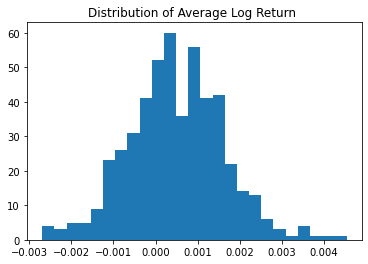

In [4]:
bins=plt.hist(returns.mean(),bins=25)
plt.title("Distribution of Average Log Return ")

### Application of Sparse Solver Split Bregman Operator

Ref: https://pylops.readthedocs.io/en/latest/api/generated/pylops.optimization.sparsity.splitbregman.html

In [5]:
#covariance matrix operator
cov_operator = pylops.MatrixMult(returns_cov.values)

# mean operator for optimization
mean_operator=pylops.Diagonal(returns_mean.values)
mean_operator


<500x500 Diagonal with dtype=float64>

SplitBregman
-----------------------------------------------------------------
The Operator Op has 500 rows and 500 cols
niter_outer =  50     niter_inner =   3   tol = 1.00e-04
mu = 2.00e+01         epsL1 = [0.01]	  epsL2 = [0.01]
-----------------------------------------------------------------
    Itn       x[0]           r2norm           r12norm
     1     1.2133e-03       2.302e-03        1.750e+00
     2     9.7769e-04       2.343e-03        1.307e+00
     3     6.9664e-04       2.348e-03        1.152e+00
     4     4.7108e-04       2.348e-03        1.090e+00
     5     3.1610e-04       2.348e-03        1.053e+00
     6     2.1408e-04       2.348e-03        1.029e+00
     7     1.4593e-04       2.348e-03        1.014e+00
     8     1.0034e-04       2.347e-03        1.004e+00
     9     6.9311e-05       2.347e-03        9.972e-01
    10     4.7847e-05       2.347e-03        9.927e-01
    11     3.3171e-05       2.347e-03        9.896e-01

Iterations = 16        Total time (s) = 0.

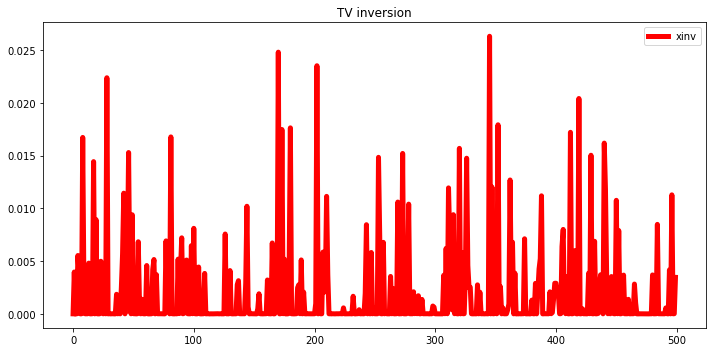

In [59]:
#covariance matrix operator
cov_operator = pylops.MatrixMult(returns_cov.values)

# mean operator for optimization
mean_operator=pylops.Diagonal(returns_mean.values)

# regularization operator; identity on our weight vector
Iop= pylops.Identity(500)

# dampening param on mse; wlog take 1
mu = 20

# epsr1
lambda1 = 0.01

# eps2
lambda2=0.01

# iterations for opt
niter_out = 50
niter_in = 3

x0=np.random.rand(500)

x_inv = pylops.optimization.sparsity.splitbregman(
    Op=cov_operator,
    y=mean_operator*x0,
    RegsL1=[Iop],
    RegsL2=[Iop],
    niter_outer=niter_out,
    niter_inner=niter_in,
    mu=mu,
    epsRL1s=[lambda1],
    epsRL2s=[lambda2],
    tol=1e-4,
    tau=1.0,
    show=True,
    **dict(iter_lim=30, damp=1e-10)
)[0]


plt.figure(figsize=(10, 5))

plt.plot(x_inv, "r", lw=5, label="xinv")
plt.legend()
plt.title("TV inversion")
plt.tight_layout()